In [29]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import decomposition
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.manifold.t_sne import TSNE
from NMF import simple_nmf
from NMF import nmf_kl

# 1) Scenarios for Synthetic Dataset 1

In [2]:
np.random.seed(0)
X_train = []
y_train = []
k=0
for i in range(5):
    k += 10*i
    for j in range(500):
        X_train.append([2*np.random.rand() for _ in range(10)])
        X_train[-1][2*i] = np.random.randint(1, 8+j)
        X_train[-1][2*i+1] = np.random.randint(1, 8+j)
        y_train.append(i)

X_train = np.array(X_train).T
y_train = np.array(y_train)

## 1.1) Viewing synthetic dataset 1
#### Data Dimensionality reduction using t-distributed Stochastic Neighbor Embedding (tSNE) to a bidimensional space

In [19]:
tsne = TSNE(n_components=2, perplexity=10.0, random_state=2)

In [20]:
proj_x = tsne.fit_transform(X_train.T)

In [21]:
proj_x.shape

(2500, 2)

## 1.2) Plotting dataset

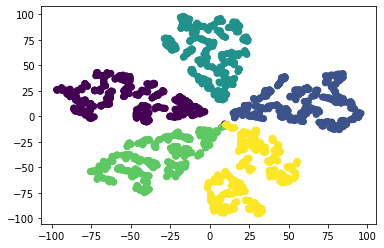

In [22]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=y_train)

## 1.3) Clustering synthetic dataset1
#### Data clusterization using K-means

In [141]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(X_train.T)

In [142]:
clusters_kmeans = kmeans.predict(X_train.T)

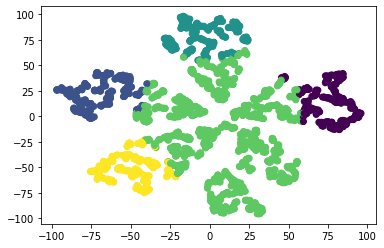

In [26]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=clusters_kmeans)

## 1.4) Assessing the quality of clustering
<b>homogeneity:</b> each cluster contains only members of a single class.

<b>completeness:</b> all members of a given class are assigned to the same cluster.

In [27]:
homogeneity_score(y_train, clusters_kmeans)

0.4805576685844159

In [30]:
completeness_score(y_train, clusters_kmeans)

0.5859003793313678

## 1.5) Non-negative Matrix Factorization

In [111]:
def clustering_NMF(H):
    l,c = H.shape
    labels_NMF = []
    for index in range(c):

        col = H[:,index]

        cluster = np.argmax(col)

        labels_NMF.append(cluster)
    
    return labels_NMF

In [112]:
W,H = simple_nmf(X_train,5,50)#,print_enabled=True)

Applying multiplicative updates on the input matrix...


In [113]:
labels_NMF = clustering_NMF(H)

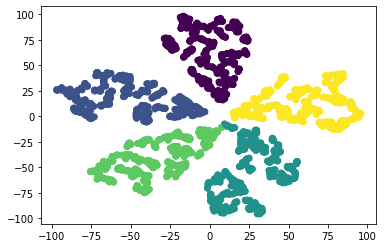

In [117]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=labels_NMF)

In [118]:
homogeneity_score(y_train,labels_NMF)

0.9949640744041353

In [119]:
completeness_score(y_train,labels_NMF)

0.9949665472396385

# 2) Scenarios for Synthetic Dataset 2

In [131]:
np.random.seed(0)
X_train_2 = []
y_train_2 = []
k=0
for i in range(5):
    k += 10*i
    for j in range(500):
        X_train_2.append([2*np.random.rand() for _ in range(10)])
        X_train_2[-1][2*i] = np.random.randint(3, 8+j)
        X_train_2[-1][2*i+1] = np.random.randint(3, 8+j)
        y_train_2.append(i)

X_train_2 = np.array(X_train_2).T
y_train_2 = np.array(y_train_2)

## 2.1) Viewing synthetic dataset 2

In [144]:
tsne_2 = TSNE(n_components=2, perplexity=10.0, random_state=2)

In [133]:
proj_x_2 = tsne_2.fit_transform(X_train_2.T)

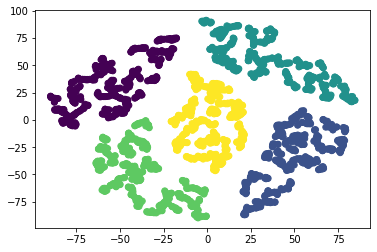

In [124]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=y_train_2)

## 2.2) Clustering the dataset2
#### Data clusterization using K-means

In [125]:
kmeans_2 = KMeans(n_clusters=5,random_state=0).fit(X_train_2.T)

In [126]:
clusters_kmeans_2 = kmeans_2.predict(X_train_2.T)

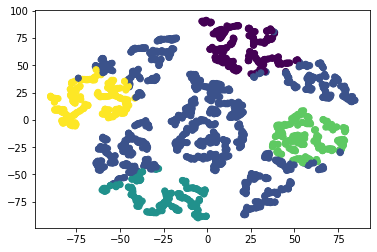

In [134]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=clusters_kmeans_2);

In [135]:
homogeneity_score(y_train, clusters_kmeans_2)

0.4677341913379719

In [136]:
completeness_score(y_train, clusters_kmeans_2)

0.578599135815021

## 2.3) Clustering synthetic dataset2
#### Applying k-means in the t-sne projection

In [145]:
kmeans_3 = KMeans(n_clusters=5,random_state=0).fit(proj_x_2)

In [146]:
clusters_kmeans_3 = kmeans_3.predict(proj_x_2)

In [188]:
H_2

array([[1.07491434e+00, 1.84647797e+00, 1.53415184e+00, ...,
        4.48323410e-01, 4.57961369e-01, 4.18796628e-01],
       [4.26828703e-01, 5.94353299e-01, 3.33471392e-01, ...,
        4.65625581e-01, 4.42896312e-01, 4.40109192e-01],
       [3.19719405e-01, 4.86953362e-01, 2.83684448e-01, ...,
        6.21026186e-12, 1.51685433e-19, 1.10809639e-29],
       [4.31725829e-01, 3.71806211e-02, 4.05680108e-01, ...,
        7.16411391e-22, 1.95316691e-18, 2.95931895e-01],
       [5.55347218e-01, 5.15755044e-01, 4.21415638e-01, ...,
        9.81623578e+01, 1.09671826e+02, 3.49315747e+01]])

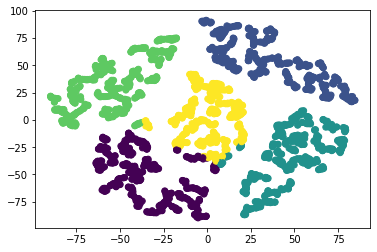

In [147]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=clusters_kmeans_3)

## 2.4) Assessing the quality of clustering
<b>homogeneity:</b> each cluster contains only members of a single class.

<b>completeness:</b> all members of a given class are assigned to the same cluster.

In [148]:
homogeneity_score(y_train, clusters_kmeans_3)

0.9133069114638998

In [149]:
completeness_score(y_train, clusters_kmeans_3)

0.9139142949348271

## 2.5) Non-negative Matrix Factorization

In [164]:
W_2,H_2 = simple_nmf(X_train_2,5,50)#,print_enabled=True)

Applying multiplicative updates on the input matrix...


In [165]:
labels_NMF_2 = clustering_NMF(H_2)

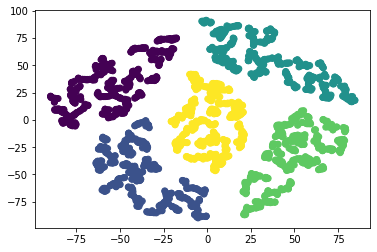

In [166]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=labels_NMF_2)

In [156]:
homogeneity_score(y_train,labels_NMF_2)

1.0

In [155]:
completeness_score(y_train,labels_NMF_2)

1.0

In [198]:
homogeneity_score(y_train, labels_NMF_2)

1.0